**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [3]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [9]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

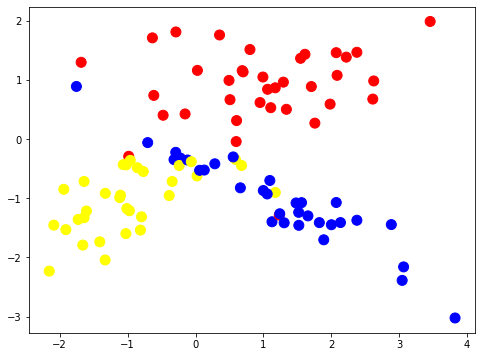

In [12]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)


In [16]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier

In [17]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [18]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [19]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Разделяющая поверхность

In [20]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [21]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

/tmp/ipykernel_14426/2096447557.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
/tmp/ipykernel_14426/2096447557.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


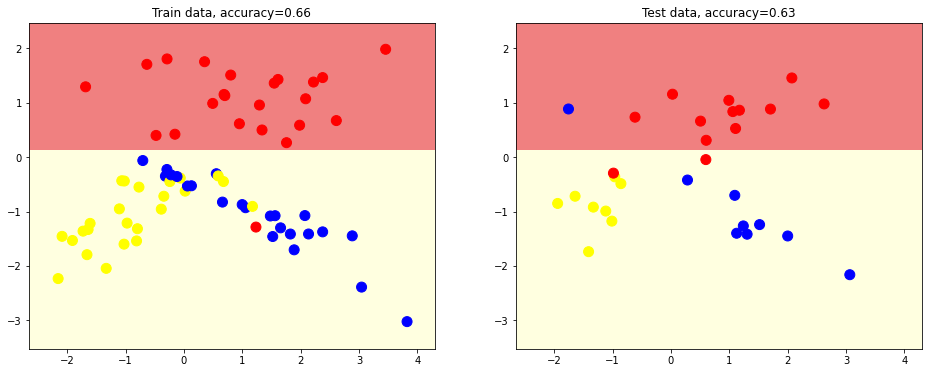

In [24]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

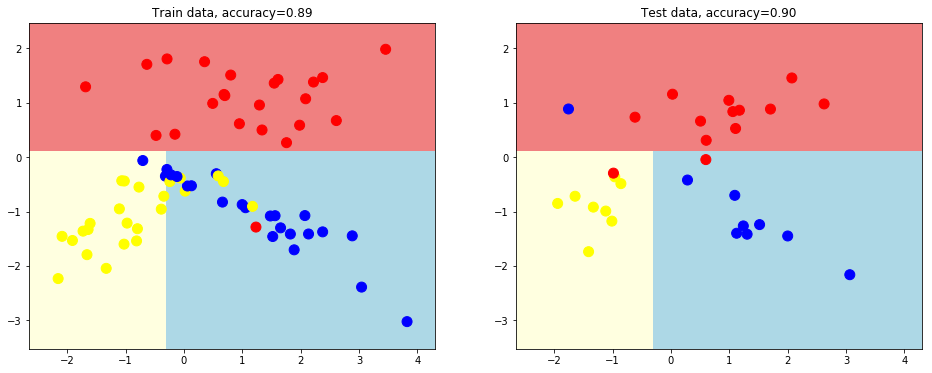

In [47]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

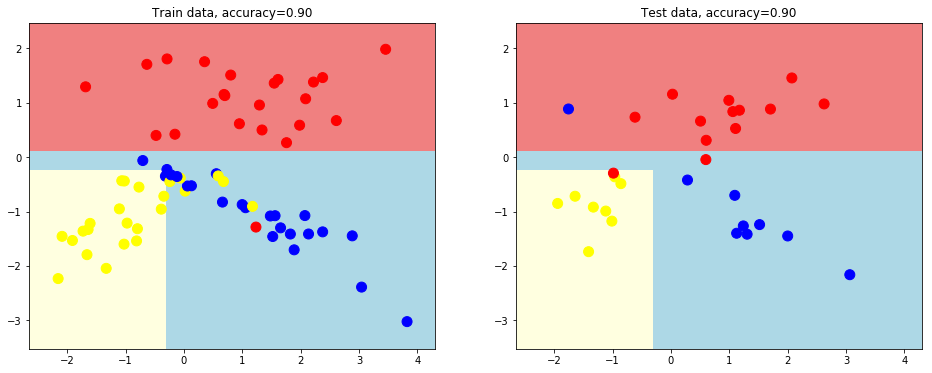

In [48]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

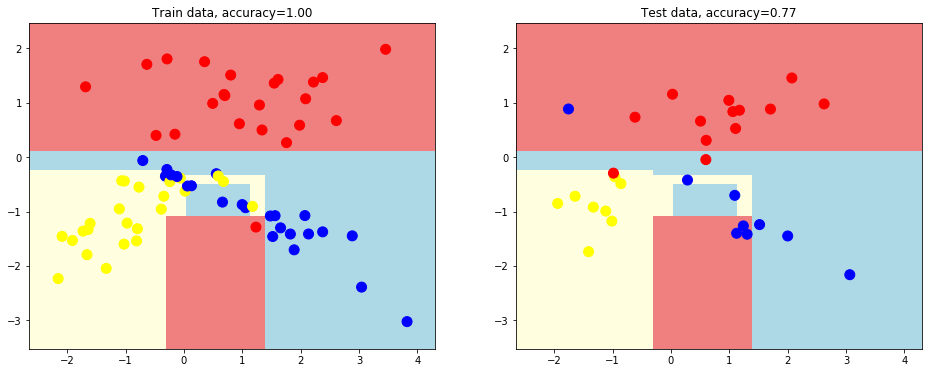

In [49]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

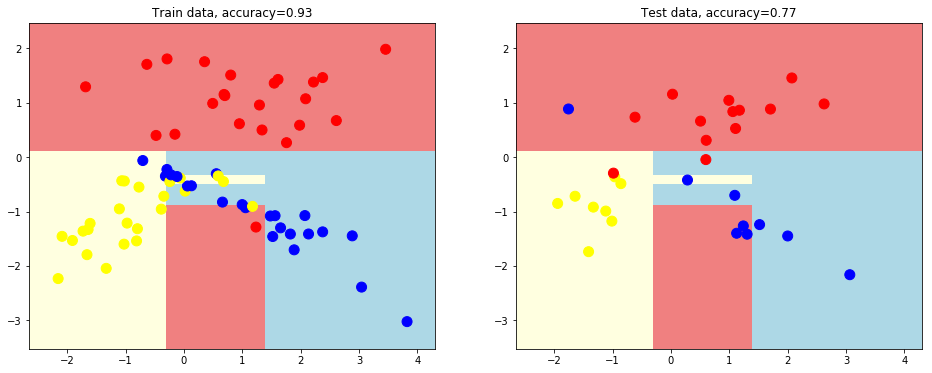

In [50]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3), 
                      train_data, train_labels, test_data, test_labels)